In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('genre.csv', header=0, index_col=None)

In [4]:
df.head()

,Title,Genre
0,Ratha and Thistle-chaser,"[[Adventure fiction|Adventure]], [[Fantasy]]"
1,Macdonald Hall Goes Hollywood,[[Adventure (genre)|Adventure]]
2,Beware the Fish,[[Adventure (genre)|Adventure]]
3,Son of Interflux,[[Adventure (genre)|Adventure]]
4,The War with Mr. Wizzle,[[Adventure (genre)|Adventure]]


In [51]:
df['fantasy'] = df.Genre.apply(lambda x: 1 if 'fantasy' in x.lower() or 'sword and planet' in x.lower() else 0)
df['science'] = df.Genre.apply(lambda x: 1 if 'science fiction' in x.lower() else 0)
df['horror'] = df.Genre.apply(lambda x: 1 if 'horror' in x.lower() else 0)
df['western'] = df.Genre.apply(lambda x: 1 if 'western' in x.lower() else 0)
df['thriller'] = df.Genre.apply(lambda x: 1 if 'thriller' in x.lower() or 'spy' in x.lower() else 0)
df['mystery'] = df.Genre.apply(lambda x: 1 if 'mystery' in x.lower() else 0)
df['detective'] = df.Genre.apply(lambda x: 1 if 'detective' in x.lower() or 'crime' in x.lower() else 0)
df['dystopia'] = df.Genre.apply(lambda x: 1 if 'dystopia' in x.lower() else 0)
df['adventure'] = df.Genre.apply(lambda x: 1 if 'adventure' in x.lower() else 0)


df['history'] = df.Genre.apply(lambda x: 1 if 'histor' in x.lower() else 0)
df['philosophy'] = df.Genre.apply(lambda x: 1 if 'philosoph' in x.lower() else 0)
df['biography'] = df.Genre.apply(lambda x: 1 if 'memoir' in x.lower() or 'biography' in x.lower() else 0)
df['young'] = df.Genre.apply(lambda x: 1 if 'juvenile' in x.lower() or 'young' in x.lower() else 0)
df['picture'] = df.Genre.apply(lambda x: 1 if 'picture book' in x.lower() or 'comic' in x.lower() else 0)
df['children'] = df.Genre.apply(lambda x: 1 if 'children' in x.lower() else 0)
df['role-playing'] = df.Genre.apply(lambda x: 1 if 'role-playing' in x.lower() else 0)
df['comedy'] = df.Genre.apply(lambda x: 1 if 'comedy' in x.lower() else 0)
df['political'] = df.Genre.apply(lambda x: 1 if 'politic' in x.lower() else 0)


In [52]:
df.head()

,Title,Genre,fantasy,science,horror,western,thriller,mystery,detective,dystopia,adventure,history,biography,young,picture,children,role-playing,comedy,philosophy,political
0,Ratha and Thistle-chaser,"[[Adventure fiction|Adventure]], [[Fantasy]]",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Macdonald Hall Goes Hollywood,[[Adventure (genre)|Adventure]],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Beware the Fish,[[Adventure (genre)|Adventure]],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Son of Interflux,[[Adventure (genre)|Adventure]],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,The War with Mr. Wizzle,[[Adventure (genre)|Adventure]],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


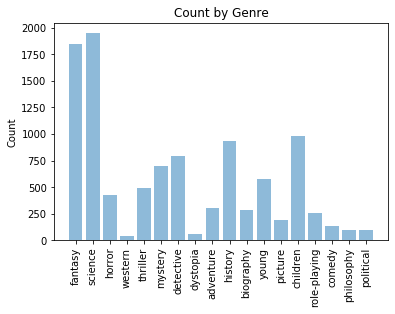

In [54]:
genre = df.columns[2:]
count = []
for i in genre:
    count.append(sum(df[i]))
    

y_pos = np.arange(len(genre))

plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, genre,rotation=90)
plt.ylabel('Count')
plt.title('Count by Genre')
plt.show()

In [61]:
sum(df['western'])

40

In [64]:
sum_row = df.sum(axis=1)

Text(0.5, 1.0, 'Count by Book')

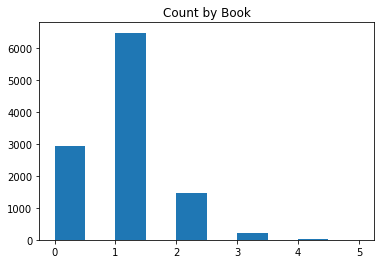

In [65]:
plt.hist(sum_row)
plt.title('Count by Book')

In [67]:
print('We have %.0f books with genre in total, but %.0f books does not belong to any of the above genres' \
      %(len(sum_row), sum(sum_row==0)))

We have 11085 books with genre in total, but 2923 books does not belong to any of the above genres


In [58]:
sum(sum_row==0)

2900

In [59]:
df[sum_row==0].Genre[:20]

134    [[African american literature|African American...
135                      [[African-American Literature]]
136                      [[African-American literature]]
137                      [[African-American literature]]
138                                [[Allegorical]] novel
140                                         [[Allegory]]
141                                         [[allegory]]
142    [[Allegory]], [[satire]], [[woodcuts]] and [[d...
228                                 [[Alternative rock]]
229    [[Alternative rock]], [[alternative country]],...
230    [[Alternative rock]], [[pop punk]], [[indie ro...
233                [[American Literature]] [[anthology]]
235                                        [[Anarchism]]
236                                        [[Anthology]]
237                                        [[Anthology]]
238                                        [[Anthology]]
239                                        [[Anthology]]
240                            

In [50]:
sum(df.Genre.apply(lambda x: 1 if 'anthology' in x.lower() else 0))

27

In [138]:
g = genre[[i>=250 for i in count]]

In [139]:
newsum = df[g].sum(axis=1)

In [140]:
print(len(df[newsum==0]))
print(len(df[newsum==0])/len(df))

3865
0.34866937302661255


In [141]:
newdf = df[newsum!=0][['Title']+list(g)]
newdf.head()

,Title,fantasy,science,horror,thriller,mystery,detective,history,young,children
0,Ratha and Thistle-chaser,1,0,0,0,0,0,0,0,0
11,The Plague Dogs,0,1,0,0,0,0,0,0,0
13,The Pirates of Malaysia,0,0,0,0,0,0,0,1,0
14,The Black Corsair,0,0,0,0,0,0,0,1,0
15,Quest for a Throne,0,0,0,0,0,0,0,1,0


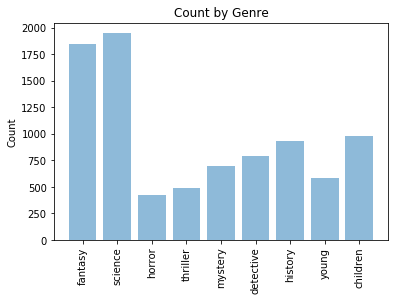

In [142]:
genre = newdf.columns[1:]
count = []
for i in genre:
    count.append(sum(newdf[i]))
    
y_pos = np.arange(len(genre))

plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, genre,rotation=90)
plt.ylabel('Count')
plt.title('Count by Genre')
plt.show()

Text(0.5, 1.0, 'Count by Book')

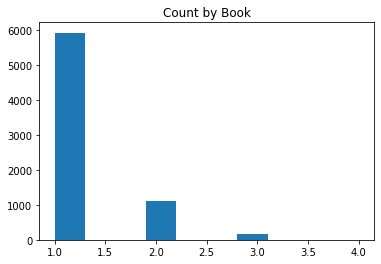

In [143]:
plt.hist(newdf.sum(axis=1))
plt.title('Count by Book')

In [144]:
newdf.to_csv('book_genre.csv')

In [145]:
g

Index(['fantasy', 'science', 'horror', 'thriller', 'mystery', 'detective',
       'history', 'young', 'children'],
      dtype='object')